In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')
print("Libraries loaded.")

Libraries loaded.


In [4]:
# Load the dataset
file_path = "../data/raw/customer_booking.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

print(f"Data loaded. Shape: {df.shape}")
display(df.head())

Data loaded. Shape: (50000, 14)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Missing values in each column:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


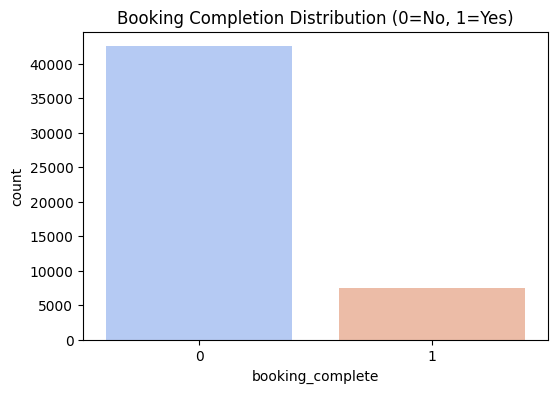

In [5]:
# --- 1. Map Days to Numbers ---
mapping = {
    "Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, 
    "Fri": 5, "Sat": 6, "Sun": 7
}
df['flight_day'] = df['flight_day'].map(mapping)

# --- 2. Check for Missing Values ---
print("Missing values in each column:")
print(df.isnull().sum())

# --- 3. Visualize Booking Balance ---
# It's important to see if our dataset is balanced or if most people don't book.
plt.figure(figsize=(6,4))
sns.countplot(x='booking_complete', data=df, palette='coolwarm')
plt.title("Booking Completion Distribution (0=No, 1=Yes)")
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
le = LabelEncoder()

# Convert categorical text columns to numbers
df['route'] = le.fit_transform(df['route'])
df['booking_origin'] = le.fit_transform(df['booking_origin'])

# For columns with few categories (Sales Channel, Trip Type), we use One-Hot Encoding
# This creates new columns like 'sales_channel_Mobile' (0 or 1)
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type'], drop_first=True)

print("Data Preprocessing complete. Here is the new structure:")
display(df.head())

Data Preprocessing complete. Here is the new structure:


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,0,61,1,0,0,5.52,0,False,False,True
1,1,112,20,3,6,0,61,0,0,0,5.52,0,False,False,True
2,2,243,22,17,3,0,36,1,1,0,5.52,0,False,False,True
3,1,96,31,4,6,0,61,0,0,1,5.52,0,False,False,True
4,2,68,22,15,3,0,36,1,0,1,5.52,0,False,False,True


In [7]:
# 1. Define X (Features) and y (Target)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# 2. Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Random Forest Model
# n_estimators=100 means we are using 100 decision trees to vote on the outcome.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model Trained successfully.")

Model Trained successfully.


Model Accuracy: 85.47%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.55      0.10      0.17      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.55     10000
weighted avg       0.82      0.85      0.81     10000



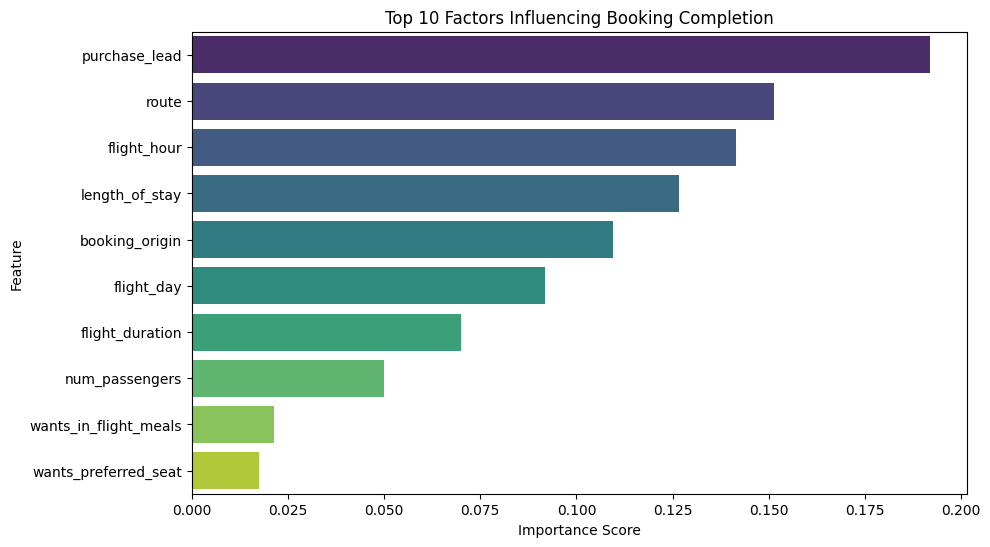

Analysis Complete. Use this chart for your presentation.


In [8]:
# 1. Check Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# 2. Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Feature Importance Visualization
# This tells us WHAT drives a customer to book.
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the Top 10 Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='viridis')
plt.title('Top 10 Factors Influencing Booking Completion')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

print("Analysis Complete. Use this chart for your presentation.")